# <center>PROJET 6 : DETECTER DES FAUX BILLETS</center>

# <center>SOMMAIRE</center>
## [CONTEXTE DU PROJET](#1)<a class="anchor" id="sommaire"></a>
## [LES DONNEES DU PROJET](#2)<a class="anchor" id="sommaire"></a>
## [IMPORT DES LIBRAIRIES](#3)<a class="anchor" id="sommaire"></a>
## [FONCTIONS PERSONNELLES](#4)<a class="anchor" id="sommaire"></a>
## [CHARGEMENT DES DONNEES](#5)<a class="anchor" id="sommaire"></a>
## [MISSION 0 :](#6)<a class="anchor" id="sommaire"></a>
## [MISSION 1 :](#7)<a class="anchor" id="sommaire"></a>
## [MISSION 2 :](#8)<a class="anchor" id="sommaire"></a>
### [2-1. Classification par Kmeans](#9)<a class="anchor" id="sommaire"></a>
### [2-2. Projection du Kmeans sur le premier plan factoriel](#10)<a class="anchor" id="sommaire"></a>
### [2-3. Matrice de confusion](#11)<a class="anchor" id="sommaire"></a>
## [MISSION 3 :](#12)<a class="anchor" id="sommaire"></a>
### [3-1. Analyse des poids des variables pour la régression logistique](#13)<a class="anchor" id="sommaire"></a>
### [3-2. Création modèle prédictif](#14)<a class="anchor" id="sommaire"></a>
## [Annexes](#15)<a class="anchor" id="sommaire"></a>

## [CONTEXTE DU PROJET](#sommaire)<a class="anchor" id="1"></a>

Votre société de consulting informatique vous propose une nouvelle mission au ministère de l'Intérieur, dans le cadre de la lutte contre la criminalité organisée, à l'Office central pour la répression du faux monnayage. Votre mission si vous l'acceptez : créer un algorithme de détection de faux billets.

Vous vous voyez déjà en grand justicier combattant sans relâche la criminalité organisée en pianotant à mains de maître votre ordinateur, pour façonner ce fabuleux algorithme  qui traquera la moindre fraude et permettra de mettre à jour les réseaux secrets de faux-monnayeurs ! La classe, non ?

... Bon, si on retombait les pieds sur terre? Travailler pour la police judiciaire, c'est bien, mais vous allez devoir faire appel à vos connaissances en statistiques, alors on y va !

## [LES DONNEES DU PROJET](#sommaire)<a class="anchor" id="2"></a>

La PJ vous transmet un jeu de données contenant les caractéristiques géométriques de billets de banque. Pour chacun d'eux, nous connaissons :

la longueur du billet (en mm) ;
la hauteur du billet (mesurée sur le côté gauche, en mm) ;
La hauteur du billet (mesurée sur le côté droit, en mm) ;
la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) ;
la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) ;
la diagonale du billet (en mm).

## [IMPORT DES LIBRAIRIES](#sommaire)<a class="anchor" id="3"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns
from plotnine import *
from scipy.cluster.hierarchy import linkage, fcluster
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans, SpectralClustering
from functions import *
import matplotlib.ticker as mtick
from scipy.stats import ttest_ind
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.compose import ColumnTransformer
import pickle
from sklearn import neighbors, metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_rel
from scipy.stats import normaltest
from scipy.stats import levene

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

## [CHARGEMENT DES DONNEES](#sommaire)<a class="anchor" id="5"></a>

In [2]:
donnees=pd.read_csv("notes.csv")

## [Mission 0 :](#sommaire)<a class="anchor" id="6"></a> 

In [3]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


In [4]:
donnees.shape

(170, 7)

In [5]:
donnees

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
5,True,172.57,104.65,104.44,4.54,2.99,113.16
6,True,172.38,103.55,103.80,3.97,2.90,113.30
7,True,171.58,103.65,103.37,3.54,3.19,113.38
8,True,171.96,103.51,103.75,4.06,3.33,113.53
9,True,172.14,104.34,104.20,4.63,3.02,112.47


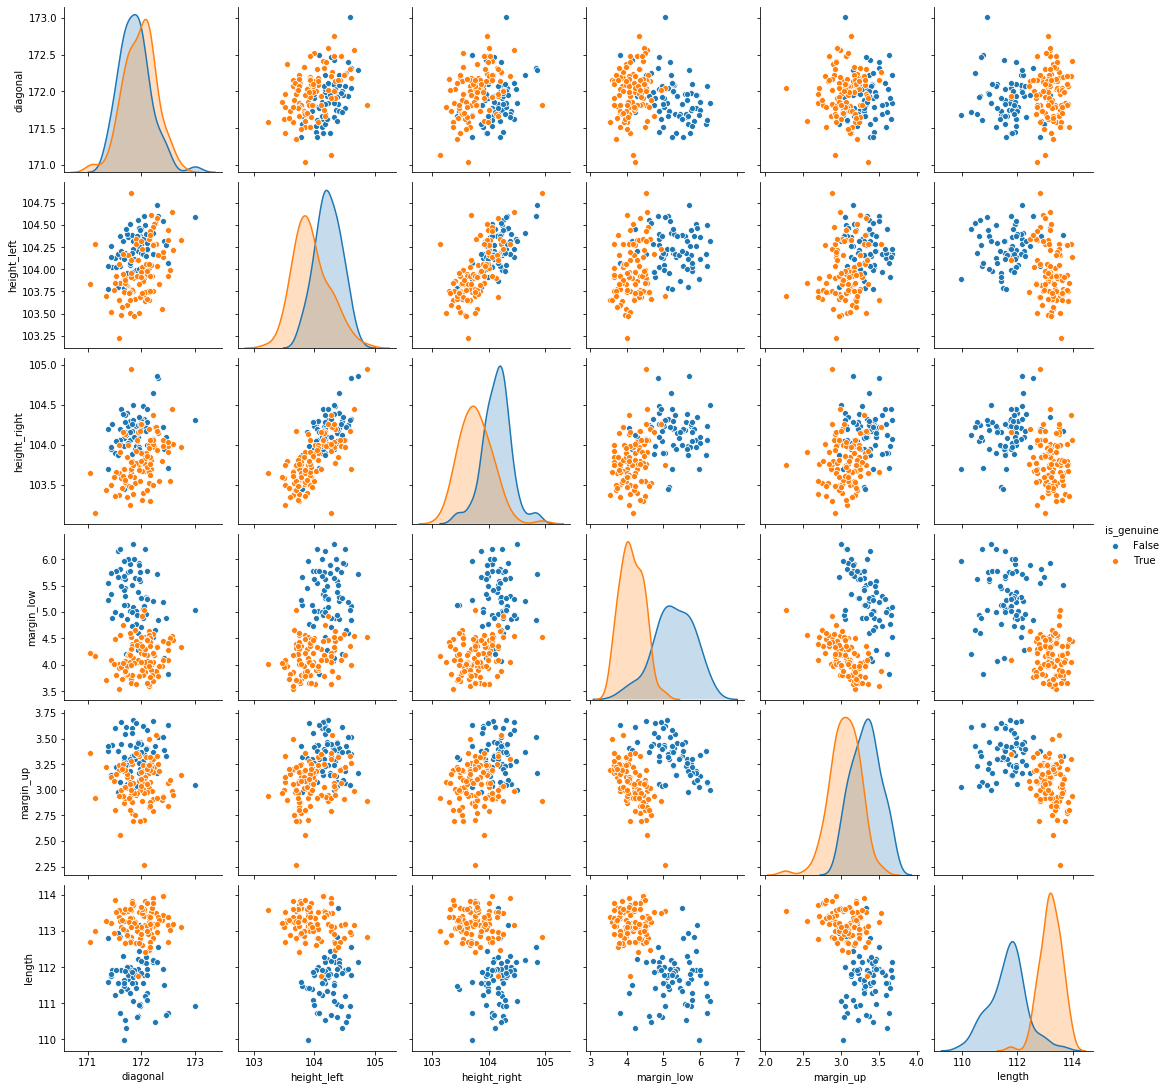

In [6]:
sns.pairplot(donnees, hue="is_genuine")
plt.savefig("pairplot.png")

In [7]:
df = donnees.groupby("is_genuine").agg(['mean', 'median'])
df.to_csv(r'Tableau.csv')
print(df)

              diagonal          height_left          height_right          \
                  mean   median        mean   median         mean  median   
is_genuine                                                                  
False       171.889857  171.875  104.230429  104.215   104.145571  104.17   
True        171.976100  172.005  103.951500  103.915   103.775900  103.76   

           margin_low        margin_up             length           
                 mean median      mean median        mean   median  
is_genuine                                                          
False        5.281571  5.265  3.334571  3.335  111.660714  111.765  
True         4.143500  4.080  3.055500  3.070  113.207200  113.210  


## [Mission 1 :](#sommaire)<a class="anchor" id="7"></a> 

### Analyse ACP

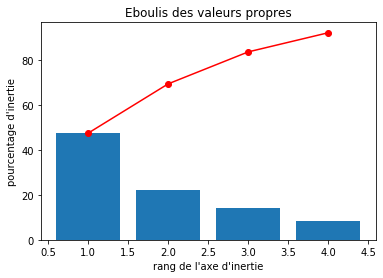

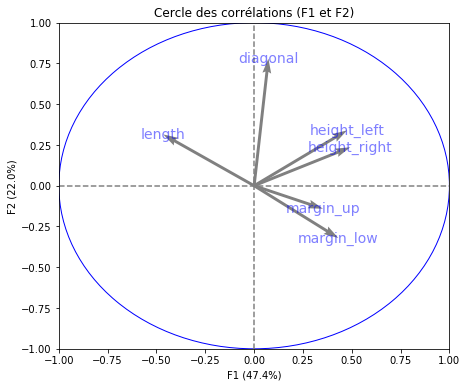

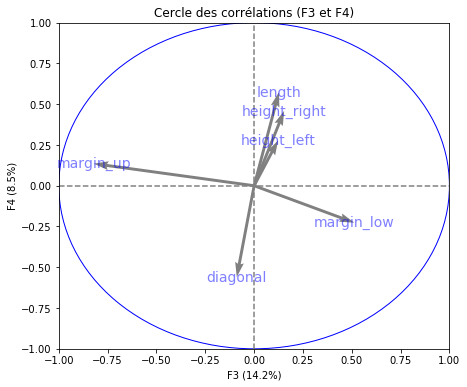

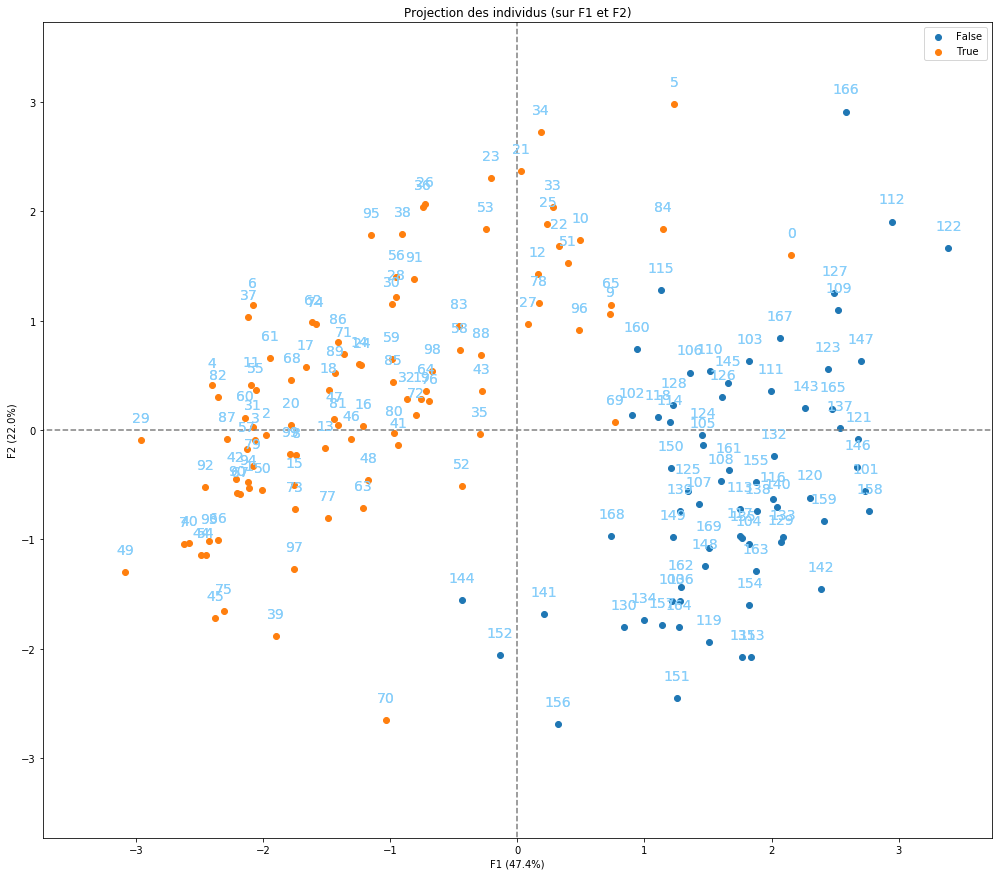

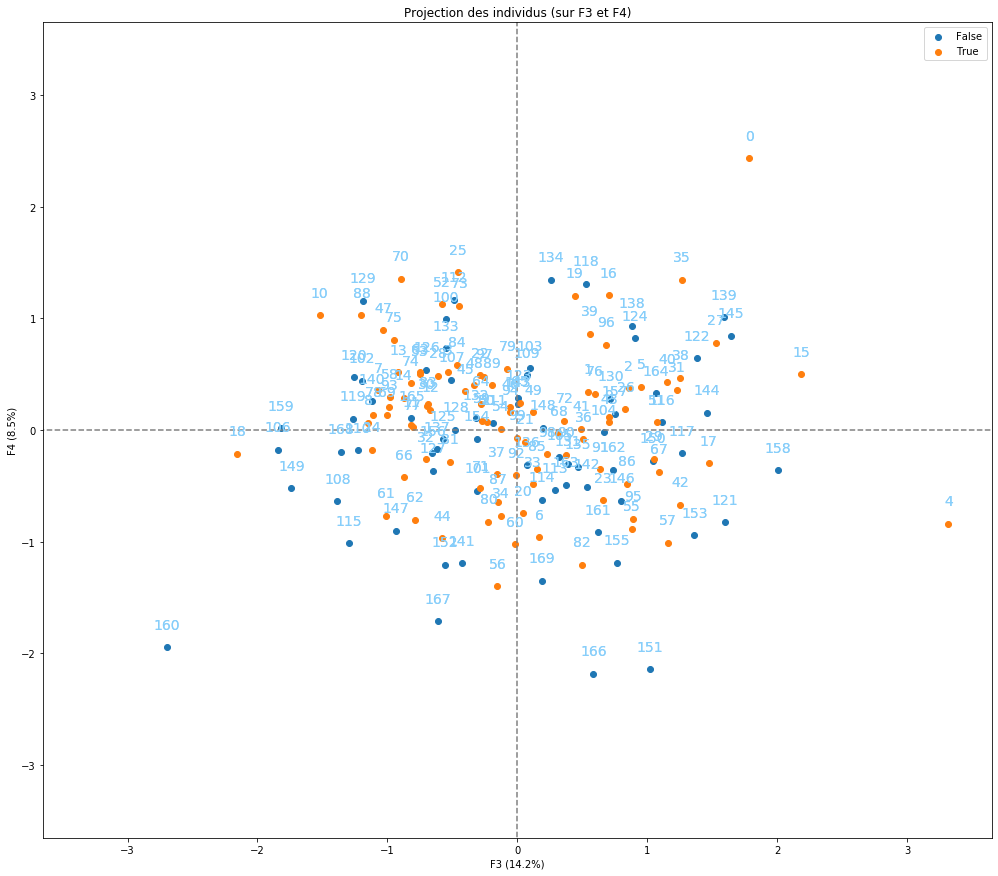

In [8]:
data = donnees.iloc[:,1:]

# choix du nombre de composantes à calculer
n_comp = 4

# préparation des données pour l'ACP
data_pca = data.fillna(data.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data_pca.index # ou data.index pour avoir les intitulés
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names), illustrative_var = donnees["is_genuine"])

plt.show()

Analyse de l'ACP sur variables :
* La composante 1 est caractérisée par anti-corrélation : lenght et corrélations : height_right, height_left, margin_low
* La composante 2 est caractérisée par la corrélation avec : diagonal

Analyse de l'ACP sur individus :
* Les vrais billets semblent caractérisés par la longueur des billets plus importante
* Les faux billets sont caractérisés par une margin_up et margin_low plus importantes

### Analyse poussée de l'ACP :

Nous allons rajouté aux données la corrélation, la qualité de représentation et la contribution des variables aux 3 premières composantes, même choses pour les individus

In [9]:
temp_ctr_cos2 = data.copy()

n = temp_ctr_cos2.shape[0]
p = temp_ctr_cos2.shape[1]
eigval = (n-1)/n*pca.explained_variance_


temp_ctr_cos2["Coord_C1"] = X_projected[:,0]
temp_ctr_cos2["Coord_C2"] = X_projected[:,1]
temp_ctr_cos2["Coord_C3"] = X_projected[:,2]
temp_ctr_cos2["CTR"] = np.sum(X_scaled**2, axis = 1)
temp_ctr_cos2["Cos2_1"] = round(((temp_ctr_cos2["Coord_C1"]**2)/temp_ctr_cos2["CTR"])*100,3)
temp_ctr_cos2["Cos2_2"] = round(((temp_ctr_cos2["Coord_C2"]**2)/temp_ctr_cos2["CTR"])*100,3)
temp_ctr_cos2["Cos2_3"] = round(((temp_ctr_cos2["Coord_C3"]**2)/temp_ctr_cos2["CTR"])*100,3)
temp_ctr_cos2["Cum_Cos2_1&2"] = round((temp_ctr_cos2["Cos2_1"]+temp_ctr_cos2["Cos2_2"]),3)
#temp_ctr_cos2["Cum_Cos2"] = temp_ctr_cos2["Cum_Cos2"].map(str) + "%"
#temp_ctr_cos2["Cos2_1"] = temp_ctr_cos2["Cos2_1"].map(str)+"%"
#temp_ctr_cos2["Cos2_2"] = temp_ctr_cos2["Cos2_2"].map(str)+"%"
#temp_ctr_cos2["Cos2_3"] = temp_ctr_cos2["Cos2_3"].map(str)+"%"
temp_ctr_cos2["CTR_1"] = (temp_ctr_cos2["Coord_C1"]**2)/(n*eigval[0])
temp_ctr_cos2["CTR_2"] = (temp_ctr_cos2["Coord_C2"]**2)/(n*eigval[1])
temp_ctr_cos2["CTR_3"] = (temp_ctr_cos2["Coord_C3"]**2)/(n*eigval[2])



sqrt_eigval = np.sqrt(eigval)

corvar = np.zeros((p,p))
corr = np.zeros((p,p))
for k in range(3):
    corr[:,k] = pcs[k,:]
    corvar[:,k] = pcs[k,:] * sqrt_eigval[k]

cos2var = corvar**2
temp1 = pd.DataFrame({'id':data.columns,'CORR_1':corr[:,0],'CORR_2':corr[:,1],'CORR_3':corr[:,2],'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'COS2_3':cos2var[:,2]})

ctrvar = cos2var

temp1["CTR_1"] = ctrvar[:,0]/eigval[0]
temp1["CTR_2"] = ctrvar[:,1]/eigval[1]
temp1["CTR_3"] = ctrvar[:,2]/eigval[2]

In [10]:
temp_ctr_cos2

,diagonal,height_left,height_right,margin_low,margin_up,length,Coord_C1,Coord_C2,Coord_C3,CTR,Cos2_1,Cos2_2,Cos2_3,Cum_Cos2_1&2,CTR_1,CTR_2,CTR_3
0,171.81,104.86,104.95,4.52,2.89,112.83,2.153639,1.599709,1.787451,18.410598,25.193,13.900,17.354,39.093,0.009584,0.011426,2.200519e-02
1,171.67,103.74,103.70,4.01,2.87,113.29,-2.110416,-0.526039,0.542563,5.444799,81.800,5.082,5.407,86.882,0.009203,0.001236,2.027481e-03
2,171.83,103.76,103.76,4.40,2.88,113.84,-1.973152,-0.048102,0.858716,4.960527,78.486,0.047,14.865,78.533,0.008045,0.000010,5.078736e-03
3,171.80,103.78,103.65,3.73,3.12,113.63,-2.059795,-0.089105,-0.531529,4.805719,88.286,0.165,5.879,88.451,0.008767,0.000035,1.945855e-03
4,172.05,103.70,103.75,5.04,2.27,113.55,-2.403180,0.412170,3.319507,18.039567,32.014,0.942,61.083,32.956,0.011933,0.000759,7.589341e-02
5,172.57,104.65,104.44,4.54,2.99,113.16,1.235656,2.983191,0.953054,11.527985,13.245,77.198,7.879,90.443,0.003155,0.039736,6.255928e-03
6,172.38,103.55,103.80,3.97,2.90,113.30,-2.079412,1.147980,0.171245,8.029025,53.854,16.414,0.365,70.268,0.008934,0.005884,2.019716e-04
7,171.58,103.65,103.37,3.54,3.19,113.38,-2.623934,-1.040133,-1.069093,9.344338,73.681,11.578,12.232,85.259,0.014226,0.004831,7.872046e-03
8,171.96,103.51,103.75,4.06,3.33,113.53,-1.736309,-0.227631,-1.146803,5.961640,50.569,0.869,22.060,51.438,0.006229,0.000231,9.058044e-03
9,172.14,104.34,104.20,4.63,3.02,112.47,0.727490,1.063881,0.704949,2.373650,22.297,47.684,20.936,69.981,0.001094,0.005054,3.422728e-03


In [11]:
temp1

,id,CORR_1,CORR_2,CORR_3,COS2_1,COS2_2,COS2_3,CTR_1,CTR_2,CTR_3
0,diagonal,0.073275,0.779639,-0.088894,0.015286,0.800781,0.006749,0.005369,0.607837,0.007902
1,height_left,0.475502,0.339250,0.122760,0.643685,0.151624,0.012871,0.226102,0.115091,0.015070
2,height_right,0.491821,0.235543,0.153830,0.688626,0.073091,0.020211,0.241888,0.055480,0.023664
3,margin_low,0.431027,-0.320537,0.512808,0.528904,0.135358,0.224597,0.185784,0.102744,0.262972
4,margin_up,0.352540,-0.141120,-0.821149,0.353822,0.026236,0.575888,0.124284,0.019915,0.674285
5,length,-0.465373,0.314536,0.126913,0.616553,0.130337,0.013757,0.216572,0.098933,0.016107


On remarque bien que la composante 1 est bien défini par 5 variables height_left, height_right, margin_low, margin_up et lenght. Seulement la margin_up avec une mauvaise qualité de représentation que l'on corrige avec l'affichage de la 3ème composante. La composante 2 est définie par la diagonal qui a aussi une très bonne qualité de représentation dessus.

La première composante est celle qui arrive le mieux à dissocier les deux classes, donc nous allons analyser si les groupes ce dissocie vraiment entre par exemple les 5 valeurs ayant la plus faible contribution et les 5 plus fortes, mais aussi

In [12]:
temp_ctr_cos2["rank_CTR_1"] = temp_ctr_cos2["CTR_1"].rank(ascending=False).map(int)
temp_ctr_cos2["rank_Cos2_1"] = temp_ctr_cos2["Cos2_1"].rank(ascending=False).map(int)
temp_ctr_cos2[temp_ctr_cos2["rank_Cos2_1"] < 6].sort_values(by="rank_Cos2_1").to_csv("qualite_repre.csv",index=False)
temp_ctr_cos2[temp_ctr_cos2["rank_CTR_1"] < 6].sort_values(by="rank_CTR_1").to_csv("contrib.csv",index=False)
temp_ctr_cos2.sort_values(by="Cum_Cos2_1&2", ascending = False).iloc[-5:,:].to_csv("mauvaise_qualité_repr.csv",index=False)
temp_ctr_cos2.sort_values(by="Cum_Cos2_1&2", ascending = False).iloc[:5,:].to_csv("bonne_qualité_repr.csv",index=False)
temp_ctr_cos2 = pd.merge(donnees["is_genuine"], temp_ctr_cos2, left_index = True, right_index = True, how="inner")

In [13]:
for h in temp_ctr_cos2.loc[:,["Cos2_1","CTR_1"]].columns:
    print(f"\n \n Test pour le {h} \n")
    a = temp_ctr_cos2[temp_ctr_cos2["is_genuine"]==True].sort_values(by=h, ascending = False).iloc[:5:,:]
    b = temp_ctr_cos2[temp_ctr_cos2["is_genuine"]==False].sort_values(by=h, ascending = False).iloc[:5:,:]
    a.to_csv("a_"+h+".csv")
    b.to_csv("b_"+h+".csv")


 
 Test pour le Cos2_1 

diagonal vient d'une distribution normale avec pvalue = 0.19018994287454516
Les deux groupes ont une variance équivalente pour diagonal avec une pvalue = 0.6147657552419648
Test de student pvalue = 0.00024148858415445857
height_left vient d'une distribution normale avec pvalue = 0.3290862900476634
Les deux groupes ont une variance équivalente pour height_left avec une pvalue = 0.7413755833598037
Test de student pvalue = 6.4711778552328974e-06
height_right vient d'une distribution normale avec pvalue = 0.6475193149394053
Les deux groupes ont une variance équivalente pour height_right avec une pvalue = 0.8298620379676502
Test de student pvalue = 3.664109425423373e-06
margin_low ne vient pas d'une distribution normale avec pvalue = 0.00010190623504607456
Les deux groupes ont une variance équivalente pour margin_low avec une pvalue = 0.661593967144325
Test de student pvalue = 5.344828893126133e-06
margin_up vient d'une distribution normale avec pvalue = 0.20035560

In [26]:
a = temp_ctr_cos2[temp_ctr_cos2["is_genuine"]==True].iloc[:5:,:]
b = temp_ctr_cos2[temp_ctr_cos2["is_genuine"]==False].iloc[:5:,:]
for i in temp_ctr_cos2.iloc[:,1:7].columns:
    k2, p = normaltest(temp_ctr_cos2[i])
    alpha = 0.05
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(f"{i} ne vient pas d'une distribution normale avec pvalue = {p}")
        k2, p = levene(a[i], b[i], center = 'median')
        if p < alpha:  
            print(f"Les deux groupes ont une variance différente pour {i} avec une pvalue = {p}")
            k2, p = ttest_ind(a[i], b[i], equal_var = False)
            print(f"Test de student pvalue = {p}")
        else :
            print(f"Les deux groupes ont une variance équivalente pour {i} avec une pvalue = {p}")
            k2, p = ttest_ind(a[i], b[i], equal_var = True)
            print(f"Test de student pvalue = {p}")
    else:
        print(f"{i} vient d'une distribution normale avec pvalue = {p}")
        k2, p = levene(a[i], b[i], center = 'mean')
        if p < alpha:  
            print(f"Les deux groupes ont une variance différente pour {i} avec une pvalue = {p}")
            k2, p = ttest_ind(a[i], b[i], equal_var = False)
            print(f"Test de student pvalue = {p}")
        else :
            print(f"Les deux groupes ont une variance équivalente pour {i} avec une pvalue = {p}")
            k2, p = ttest_ind(a[i], b[i], equal_var = True)
            print(f"Test de student pvalue = {p}")

diagonal vient d'une distribution normale avec pvalue = 0.19018994287454516
Les deux groupes ont une variance équivalente pour diagonal avec une pvalue = 0.19688842161253142
Test de student pvalue = 0.987410475938889
height_left vient d'une distribution normale avec pvalue = 0.3290862900476634
Les deux groupes ont une variance équivalente pour height_left avec une pvalue = 0.11051583899279768
Test de student pvalue = 0.30219184735510035
height_right vient d'une distribution normale avec pvalue = 0.6475193149394053
Les deux groupes ont une variance équivalente pour height_right avec une pvalue = 0.09000533428249256
Test de student pvalue = 0.29285683740780943
margin_low ne vient pas d'une distribution normale avec pvalue = 0.00010190623504607456
Les deux groupes ont une variance équivalente pour margin_low avec une pvalue = 0.7595025055275466
Test de student pvalue = 0.06798684758586437
margin_up vient d'une distribution normale avec pvalue = 0.2003556047699367
Les deux groupes ont une 

L'analyse de la contribution et de la qualité de représentation des 5 meilleurs individus des vrais billets face aux 5 plus fort individus des faux billets montre des différenciations surtout sur les variables : lenght, margin_up et margin_low.

## [Mission 2 :](#sommaire)<a class="anchor" id="8"></a> 

### [Classification par Kmeans](#sommaire)<a class="anchor" id="9"></a>  

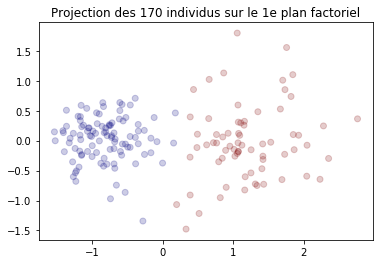

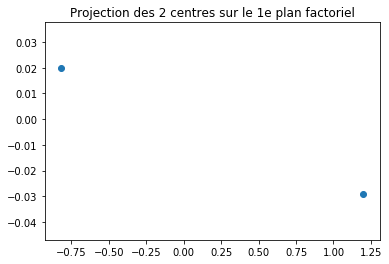

In [15]:
# Nombre de clusters souhaités
n_clust = 2

# préparation des données pour le clustering
X = donnees.drop("is_genuine", axis = 1).values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
X_scaled = preprocessing.StandardScaler().fit_transform(X)


# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=3).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

# Affichage des positions des centres de classes
plt.figure()
centroids5 = km.cluster_centers_
centroids_projected = pca.transform(centroids5)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids5)))
plt.show()

Le kmeans arrive à bien dissocier deux clusters qui sont bien différenciés

### [Projection du Kmeans sur le premier plan factoriel](#sommaire)<a class="anchor" id="10"></a>   

On créé un data frame pour concaténer les variables avec l'identification de chaque billet dans le Kmeans

In [16]:
centroides = data.copy()
centroides["cluster"] = clusters

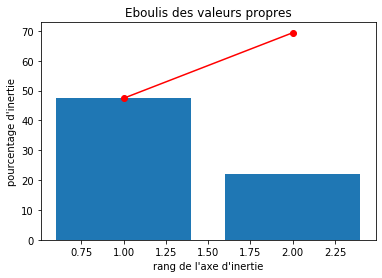

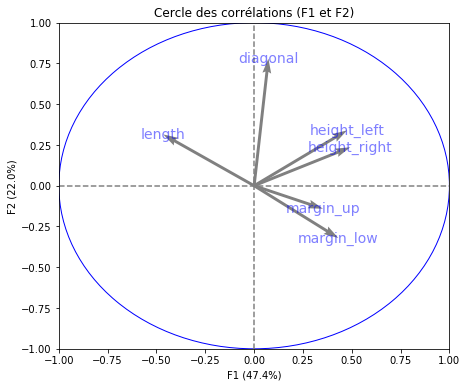

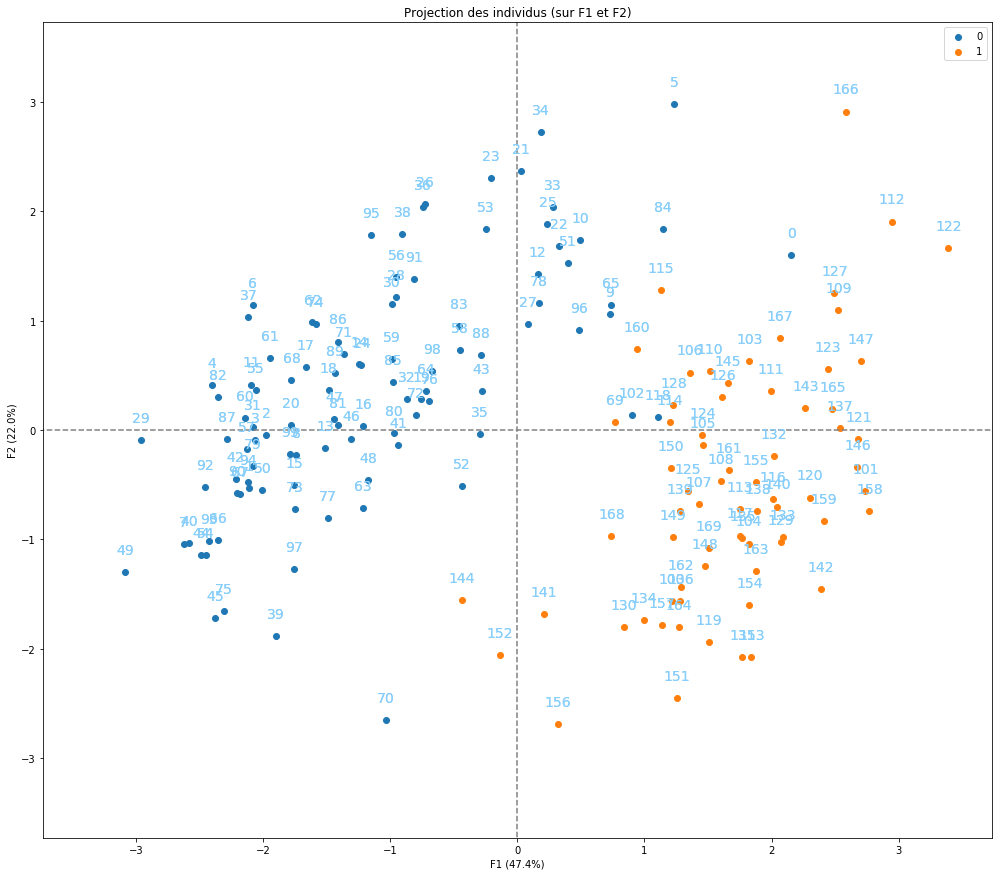

In [17]:
data = donnees.iloc[:,1:]

# choix du nombre de composantes à calculer
n_comp = 2

# préparation des données pour l'ACP
data_pca = data.fillna(data.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data_pca.index # ou data.index pour avoir les intitulés
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names), illustrative_var = centroides.iloc[:,-1])


plt.show()

On remarque que la projection des individus ressemble quasiment à celle des données de base

### [Matrice de confusion](#sommaire)<a class="anchor" id="11"></a> 

Nous créons une matrice de confusion afin de comparer la classification Kmeans face aux véritables classes

In [18]:
#On inverse le classement K-means pour coller à nos targets
Kmeans_target = centroides.copy()
mask0 = centroides.iloc[:,-1] == 0
mask1 = centroides.iloc[:,-1] == 1
Kmeans_target.loc[mask0,"cluster"] = 1
Kmeans_target.loc[mask1,"cluster"] = 0

temp = donnees.copy()
temp["is_genuine"] = temp["is_genuine"].astype('category')
y = temp["is_genuine"].cat.codes

conf = confusion_matrix(y, Kmeans_target.iloc[:,-1])
conf

array([[68,  2],
       [ 1, 99]], dtype=int64)

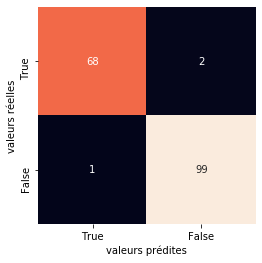

In [19]:
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(temp["is_genuine"].unique())
            , yticklabels=list(temp["is_genuine"].unique()))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');

**Le Kmeans arrive à retrouvé avec peu d'erreur la répartition entre les vrais et les faux billets comme on peut le voir dans la matrice de confusion et qui confirme ce que l'on a observé avec la projection sur l'ACP**

## [Mission 3 :](#sommaire)<a class="anchor" id="12"></a>

Pour créer le modèle prédictif nous commençons à analyser les variables qui séparent le mieux les deux classes

diagonal:4.38%
height_left:17.11%
height_right:20.42%
margin_low:41.54%
margin_up:19.79%
length:38.57%


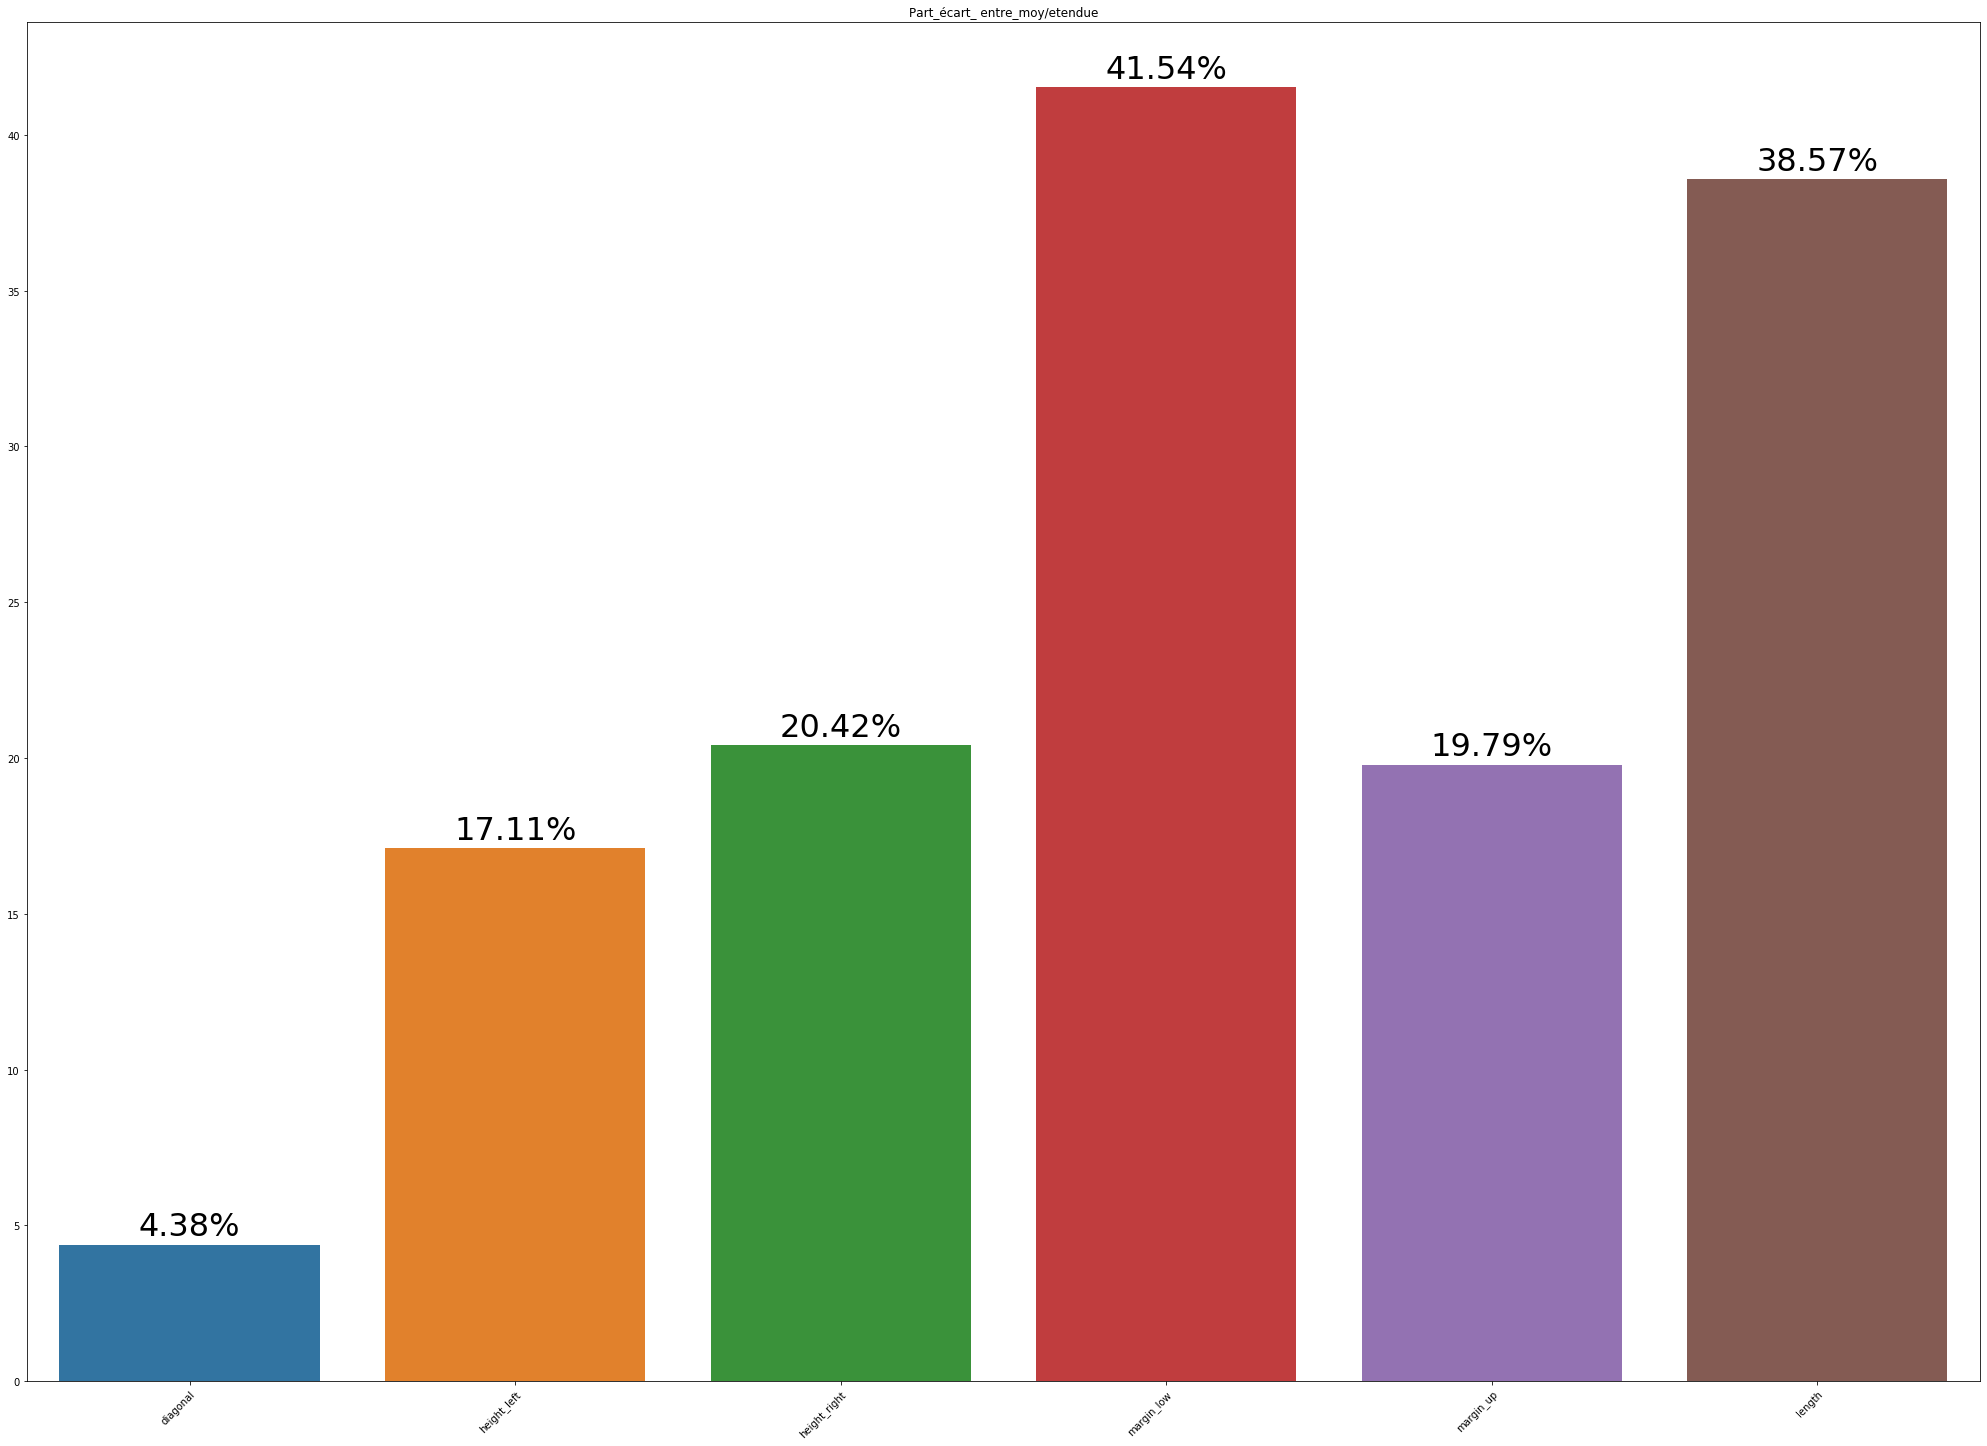

In [20]:
g = []
h = []

for i in donnees.drop("is_genuine",axis=1).columns:
    etendu = donnees[i].max() - donnees[i].min()
    moy_true = donnees[donnees["is_genuine"]==True].loc[:,i].mean()
    moy_false = donnees[donnees["is_genuine"]==False].loc[:,i].mean()
    Taille_ecart = round((np.absolute(moy_true - moy_false)) / etendu * 100, 2)
    print(i + ":" + str(Taille_ecart) + "%")
    g.append(i)
    h.append(Taille_ecart)

fig, ax = plt.subplots(figsize=(35, 25))
axs = sns.barplot(g,h)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.title("Part_écart_ entre_moy/etendue")
a=0
for index in g:
    axs.text(a, h[a]+0.3,str(h[a])+"%", color='black', ha="center", fontsize= 32)
    a+=1    
plt.draw()

**On remarque grâce à ce tableau que les deux variables qui sont les plus susceptibles de différencier les 2 classes sont "Lenght" et "margin_low"**

### [Analyse des poids des variables pour la régression logistique](#sommaire)<a class="anchor" id="13"></a>

In [21]:
temp = donnees.copy()
temp["is_genuine"] = temp["is_genuine"].astype('category')
y = temp["is_genuine"].cat.codes
x = temp.iloc[:,1:].select_dtypes(np.number)
modele_logit = LogisticRegression(penalty='none',solver='newton-cg', fit_intercept=True)
modele_logit.fit(x,y)
pd.DataFrame(np.concatenate([modele_logit.intercept_.reshape(-1,1),
                             modele_logit.coef_],axis=1),
             index = ["coef"],
             columns = ["constante"]+list(x.columns)).T

,coef
constante,-0.247670
diagonal,-3.361121
height_left,-17.240598
height_right,5.039367
margin_low,-65.162074
margin_up,-100.007209
length,21.989445


**On remarque que deux variables ont un poids négligeable pour la classification, nous allons supprimer les 2 variables pour créer le modèle prédictif : "diagonal" et "height_right"**

### [Création modèle prédictif](#sommaire)<a class="anchor" id="14"></a>

On supprime les variables avec un poids négligeable

In [22]:
temp = temp.drop(['diagonal','height_right', 'height_left'], axis=1).copy()
y = temp["is_genuine"].cat.codes
x = temp.select_dtypes(np.number)

Création d'un pipeline pour automatiser le traitement des données qui seront interprétées

In [23]:
col_quanti = ['margin_low', 'margin_up', 'length']

transfo_quanti = Pipeline(steps=[('scaler', StandardScaler())])

# on définit les colonnes et les transformations pour
# les variables qualitatives
col_quali = []

transfo_quali = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='constant', fill_value='manquant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# on définit l'objet de la classe ColumnTransformer
# qui va permettre d'appliquer toutes les étapes
preparation = ColumnTransformer(
    transformers=[
        ('quanti', transfo_quanti , col_quanti)])


# on crée un pipeline de traitement intégrant la préparation
modele_ml = Pipeline(steps=[('preparation', preparation),
                      ('logit', LogisticRegression(solver='liblinear'))])

# on sépare la cible du reste des données
#x = temp.drop('is_genuine', axis=1)

# on construit les échantillons d'apprentissage et de validation
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size = 0.8)

# on ajuste le modèle en utilisant les données d'apprentissage
# le modèle comporte la préparation et le modèle logistique
#modele_ml.fit(x_train,y_train)

Création d'une gridsearch afin d'optimiser les hyper paramètres

In [24]:
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# on définit les paramètres à faire varier
param_grid = {
    'logit__C': [0.1, 1.0, 10, 100]}

# on crée le modèle de grille
grid_search = GridSearchCV(modele_ml, param_grid, cv=5, scoring=score )
# on ajuste aux données d'apprentissage
grid_search.fit(x, y)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(grid_search.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        grid_search.cv_results_['mean_test_score'], # score moyen
        grid_search.cv_results_['std_test_score'],  # écart-type du score
        grid_search.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )
    
modele_ml = grid_search

filename = 'finalized_model.sav'
pickle.dump(modele_ml, open(filename, 'wb'))

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'logit__C': 0.1}
Résultats de la validation croisée :
accuracy = 0.994 (+/-0.024) for {'logit__C': 0.1}
accuracy = 0.994 (+/-0.024) for {'logit__C': 1.0}
accuracy = 0.994 (+/-0.024) for {'logit__C': 10}
accuracy = 0.988 (+/-0.029) for {'logit__C': 100}


**Nous avons donc un modèle prédictif avec une précision de 0.994, ce qui est déjà très performant**

## [Annexes](#sommaire)<a class="anchor" id="15"></a>

0.007352941176470562


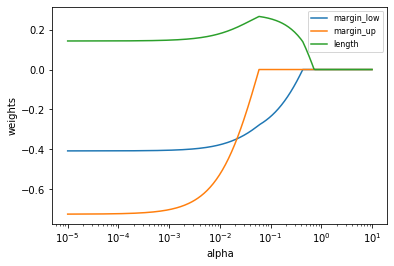

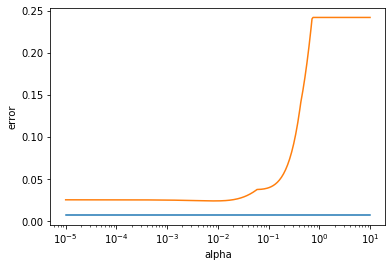

[0.007352941176470562, 0.024220254944088162]


In [25]:
baseline_error = 1-(np.mean(grid_search.cv_results_['mean_test_score']))

print(baseline_error)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size = 0.8)

n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)
lasso = ElasticNet()

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)
    
    errors.append([baseline_error, np.mean((lasso.predict(x_test) - y_test) ** 2)])

ax = plt.gca()

ax.plot(alphas, coefs)
ax.legend(x_test.columns, loc='upper right', fontsize = 8)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

print(min(errors))